In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [63]:
COVID = pd.read_excel('./owid-covid-data-ko.xlsx')
COVID = COVID.fillna(0)
COVID.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,KOR,Asia,South Korea,2020-01-22,1,0.0,0.0,0.0,0.0,0.0,...,6.2,40.9,0.0,12.27,83.03,0.916,0.0,0.00,0.00,0.000000
1,KOR,Asia,South Korea,2020-01-23,1,0.0,0.0,0.0,0.0,0.0,...,6.2,40.9,0.0,12.27,83.03,0.916,0.0,0.00,0.00,0.000000
2,KOR,Asia,South Korea,2020-01-24,2,1.0,0.0,0.0,0.0,0.0,...,6.2,40.9,0.0,12.27,83.03,0.916,0.0,0.00,0.00,0.000000
3,KOR,Asia,South Korea,2020-01-25,2,0.0,0.0,0.0,0.0,0.0,...,6.2,40.9,0.0,12.27,83.03,0.916,0.0,0.00,0.00,0.000000
4,KOR,Asia,South Korea,2020-01-26,3,1.0,0.0,0.0,0.0,0.0,...,6.2,40.9,0.0,12.27,83.03,0.916,43.4,0.17,2.47,0.845918


In [64]:
COVID_KOR=COVID[COVID['iso_code'] == 'KOR']
COVID_KOR

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,KOR,Asia,South Korea,2020-01-22,1,0.0,0.000,0.0,0.0,0.000,...,6.2,40.9,0.0,12.27,83.03,0.916,0.0,0.00,0.00,0.000000
1,KOR,Asia,South Korea,2020-01-23,1,0.0,0.000,0.0,0.0,0.000,...,6.2,40.9,0.0,12.27,83.03,0.916,0.0,0.00,0.00,0.000000
2,KOR,Asia,South Korea,2020-01-24,2,1.0,0.000,0.0,0.0,0.000,...,6.2,40.9,0.0,12.27,83.03,0.916,0.0,0.00,0.00,0.000000
3,KOR,Asia,South Korea,2020-01-25,2,0.0,0.000,0.0,0.0,0.000,...,6.2,40.9,0.0,12.27,83.03,0.916,0.0,0.00,0.00,0.000000
4,KOR,Asia,South Korea,2020-01-26,3,1.0,0.000,0.0,0.0,0.000,...,6.2,40.9,0.0,12.27,83.03,0.916,43.4,0.17,2.47,0.845918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,KOR,Asia,South Korea,2022-05-04,17438068,42277.0,50206.000,23158.0,79.0,98.857,...,6.2,40.9,0.0,12.27,83.03,0.916,0.0,0.00,0.00,0.000000
834,KOR,Asia,South Korea,2022-05-05,17464782,26714.0,38595.143,23206.0,48.0,68.857,...,6.2,40.9,0.0,12.27,83.03,0.916,0.0,0.00,0.00,0.000000
835,KOR,Asia,South Korea,2022-05-06,17504334,39552.0,38065.143,23289.0,83.0,70.714,...,6.2,40.9,0.0,12.27,83.03,0.916,0.0,0.00,0.00,0.000000
836,KOR,Asia,South Korea,2022-05-07,17544398,40064.0,38392.714,23360.0,71.0,69.286,...,6.2,40.9,0.0,12.27,83.03,0.916,0.0,0.00,0.00,0.000000


In [65]:
import xgboost as xgb 
from sklearn.metrics import mean_squared_error 
import pandas as pd 
import numpy as np



In [66]:
X = COVID_KOR[['total_cases',
 'icu_patients',
 'total_vaccinations',
 'stringency_index',
 'new_cases',
 'weekly_hosp_admissions',
 'weekly_icu_admissions',
 'positive_rate',
 'reproduction_rate',
'new_tests',
'total_tests']]
y = COVID_KOR['new_deaths']

In [67]:
data_dmatrix = xgb.DMatrix(data=X,label=y)




/Users/moon/opt/anaconda3/envs/ds_study/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [69]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', 
                          colsample_bytree = 0.3, 
                          learning_rate = 0.1, 
                          max_depth = 5, 
                          alpha = 10, 
                          n_estimators = 10)




In [70]:
xg_reg.fit(X_train,y_train) 
pred = xg_reg.predict(X_test)



[12:56:09] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [71]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, pred)) 
print("RMSE: %f" % (rmse))



RMSE: 30.719773


In [72]:
params = {"objective":"reg:linear",
          'colsample_bytree': 0.3,
          'learning_rate': 0.1,  
          'max_depth': 5, 
          'alpha': 10} 
cv_results = xgb.cv(dtrain=data_dmatrix, 
                    params=params, 
                    nfold=3, 
                    num_boost_round=50,
                    early_stopping_rounds=10,
                    metrics="rmse", 
                    as_pandas=True, 
                    seed=123)



[12:56:10] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[12:56:10] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[12:56:10] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [73]:
cv_results.head()


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,67.301089,1.840428,67.266462,4.315762
1,61.458098,1.627965,61.620452,4.359954
2,56.197760,1.327483,56.678703,4.503090
3,51.984774,1.324558,52.518176,4.522979
4,47.625479,1.076498,48.262933,4.577405


In [74]:
print((cv_results["test-rmse-mean"]).tail(1))




49    20.534244
Name: test-rmse-mean, dtype: float64


In [75]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)




[12:56:11] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [76]:
# conda install graphviz


Solving environment: \ ^C
failed with initial frozen solve. Retrying with flexible solve.

CondaError: KeyboardInterrupt


Note: you may need to restart the kernel to use updated packages.


In [ ]:
# pip uninstall Graphviz -y

ImportError: You must install graphviz to plot tree

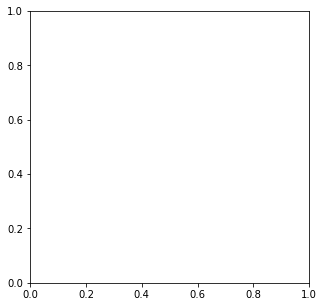

In [77]:
import matplotlib.pyplot as plt 
xgb.plot_tree(xg_reg,num_trees=0) 
plt.rcParams['figure.figsize'] = [50, 10] 
plt.show()



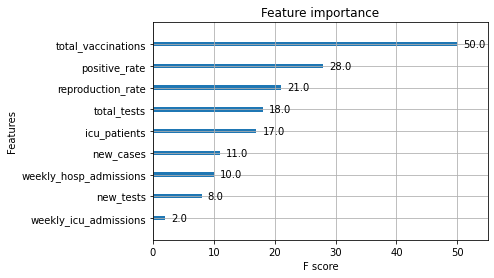

In [ ]:
xgb.plot_importance(xg_reg) 
plt.rcParams['figure.figsize'] = [5, 5] 
plt.show()

